<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Midterm/HOA%204.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<u>**Hands-On Activity 4.1** | **K Nearest Neighbors**
**Name** | Cu, Angelo Luis C.
**Section** | CPE31S3
**Date Performed**: | 10/1/2024
**Date Submitted**: | 10/1/2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

# Activity 3.3 K Nearest Neighbors

Objective(s):

This activity aims to perform classification using K Nearest Neighbors

Intended Learning Outcomes (ILOs):
* Build the model using K Nearest Neighbors.
* Evaluate the performance of the model.
* Choose the best k-value.


Resources:
* Jupyter Notebook
* Classified data

Procedure:

Import the libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Load the data. Set index_col=0 to use the first column as the index.

In [ ]:
df = pd.read_csv("Classified Data",index_col=0)

In [ ]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1



Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Split the data into a training set and a testing set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

Buid a model using k=1

Remember that wwe are building a model to predict whether someone will TARGET CLASS or not.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

Evaluate the KNN model.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
print(confusion_matrix(y_test,pred))

[[135  14]
 [ 11 140]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       149
           1       0.91      0.93      0.92       151

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



Choose a K value. Create a method to pick a good value of K.

In [ ]:
error_rate = []


for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Create a visualization to compare the error rate and k value

Text(0, 0.5, 'Error Rate')

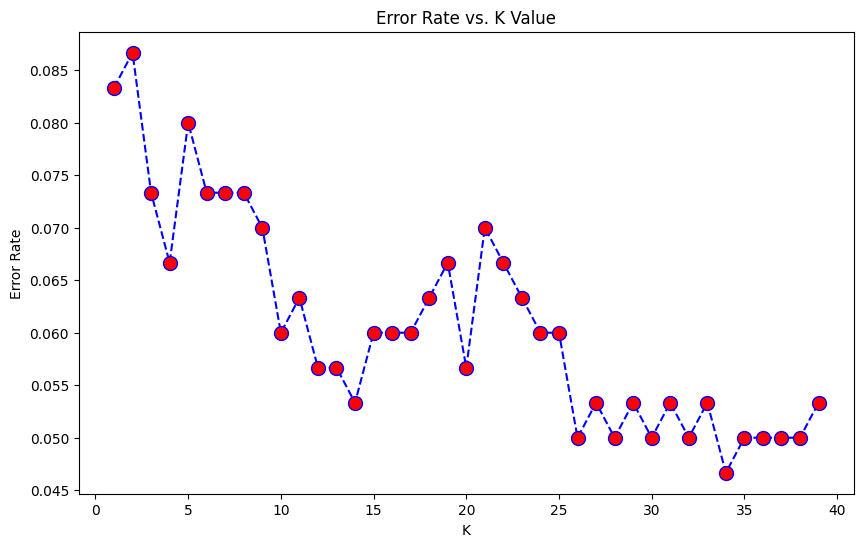

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Interpret the result of the graph

<font color='blue'> It can be noticed that as the K gets higher, the error rate also gets lower. </font>


Compare the classification report of K=1 and K=23

In [ ]:
# K = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[135  14]
 [ 11 140]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.92       149
           1       0.91      0.93      0.92       151

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [ ]:
#K = 23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[135  14]
 [  5 146]]


              precision    recall  f1-score   support

           0       0.96      0.91      0.93       149
           1       0.91      0.97      0.94       151

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Interpret the result of the graph.

<font color='blue'> The results improved with K=23 comapred to K=1, where the KNN Classifier of K=23 correctly predicting 10 more false datapoints.

Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9266666666666666


Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.92


Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`?

In [ ]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

score_list = list()

for k in range(1, 30):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    score_list.append((k, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [ ]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

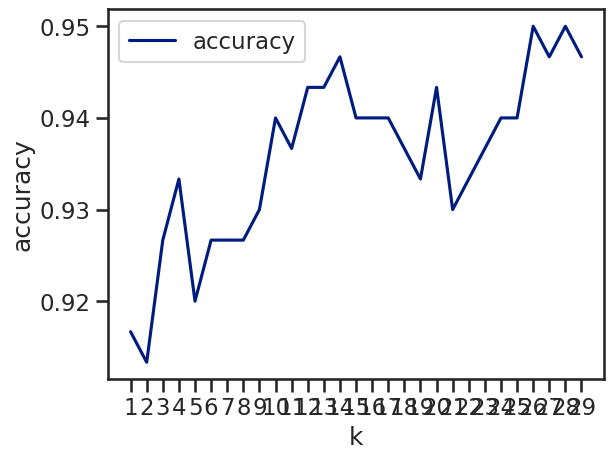

In [ ]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 30));

<font color='blue'> With k=1, the accuracy is comparably lower (around 0.88) compared to the accuracy with k=29 (0.93)

Supplementary Activities:

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Standardize the variables.
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Build the model using K Nearest Neighbor. Use k value from 1 to 50.
* Evaluate the model using classification report, accuracy , confusion matrix and roc_auc_score
* Compare the model using their accuracy report.
* Create a graph to compare the accuracy based from eah k values.

In [ ]:
# The dataset that I have chosen is the Room Occupancy using IoT dataset
# Link: https://www.kaggle.com/datasets/kukuroo3/room-occupancy-detection-data-iot-sensor
df = pd.read_csv('Occupancy.csv')
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [ ]:
df.info()
# It can be seen that there are 6 features and 1 target columns
# with 1 feature being an object datatype, 5 features being float, and 1 target being int
# There are also 20,560 initial datapoints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# I decided to drop the date feature to simplify the processing
df.drop(['date'], axis=1, inplace=True)
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,20.8900,28.0225,418.750000,1632.000000,0.004279,1


<Axes: >

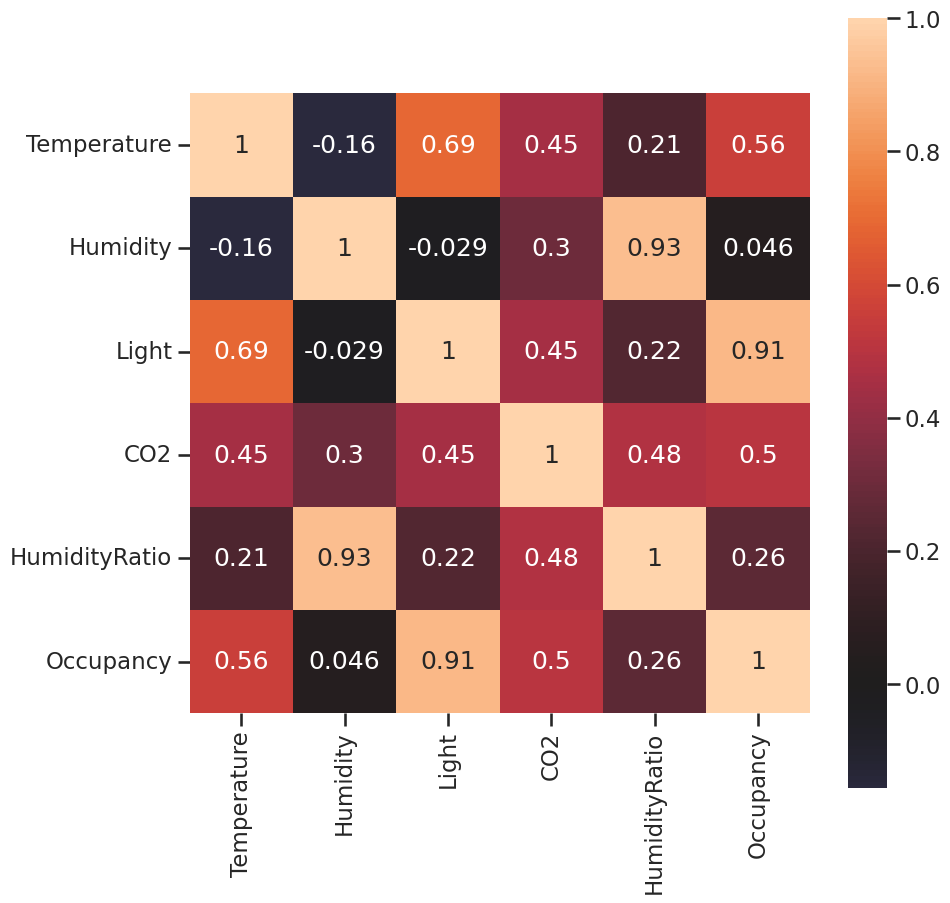

In [ ]:
# Plots the correlations of each variable
plt.figure(figsize=(10,10))
sns.heatmap(
    df.sort_index().corr(),
    annot=True, center=0, square=True
)
# It can be noticed the correlations between features and target are already high except the humidity,
# Therefore it might be better to drop the humidity feature for the model to be more accurate

In [ ]:
df.drop(['Humidity'], axis=1, inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Checks for duplicated values
df[df.duplicated()].shape[0]

1441

In [ ]:
# Removes duplicates
df.drop_duplicates(inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Standardize the variables
# Using StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Occupancy',axis=1))
scaled_features = scaler.transform(df.drop('Occupancy',axis=1))
X_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
X_scaled

,Temperature,Light,CO2,HumidityRatio
0,2.579070,2.068302,0.145933,0.682903
1,2.596039,2.036675,0.181367,0.694053
2,2.607352,2.010009,0.210685,0.684201
3,2.600281,1.642966,0.226767,0.656151
4,2.629977,1.619013,0.240213,0.686092
...,...,...,...,...
19114,-0.140637,1.345300,2.537880,-0.040288
19115,-0.093501,1.316231,2.567145,-0.017598
19116,-0.069934,1.316231,2.589291,-0.008996
19117,-0.069934,1.294138,2.938885,0.046985


In [ ]:
# Perform descriptive statistics such as mean, median and mode
X_scaled.describe()

,Temperature,Light,CO2,HumidityRatio
count,1.911900e+04,1.911900e+04,1.911900e+04,1.911900e+04
mean,4.780805e-15,1.337912e-16,-2.854212e-16,9.632966e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-1.851648e+00,-6.534807e-01,-9.185075e-01,-2.059313e+00
25%,-6.567681e-01,-6.534807e-01,-7.500383e-01,-6.687636e-01
50%,-1.642042e-01,-6.534807e-01,-4.083542e-01,7.344356e-02
75%,6.465230e-01,1.246078e+00,3.825813e-01,7.774146e-01
max,3.246821e+00,7.240481e+00,4.345168e+00,2.928923e+00


In [ ]:
X_scaled.median()

,0
Temperature,-0.164204
Light,-0.653481
CO2,-0.408354
HumidityRatio,0.073444


In [ ]:
X_scaled.mode().T

,0
Temperature,-0.541287
Light,-0.653481
CO2,-0.838623
HumidityRatio,-1.203033


In [ ]:
# Build the model using K Nearest Neighbor. Use k value from 1 to 50
from sklearn.model_selection import train_test_split

X = X_scaled
y = df['Occupancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Evaluate the model using classification report, accuracy , confusion matrix and roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Using k = 25 (halfway point)
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))
# It can be seen that the metrics are all high (0.96-1.0), which suggests an accurate model

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4345
           1       0.96      0.99      0.98      1391

    accuracy                           0.99      5736
   macro avg       0.98      0.99      0.99      5736
weighted avg       0.99      0.99      0.99      5736



In [ ]:
# Getting the accuracy score
print(accuracy_score(y_test, y_pred))
# The accuracy computed is high (0.98), which might suggest overfitting

0.9895397489539749


<Axes: >

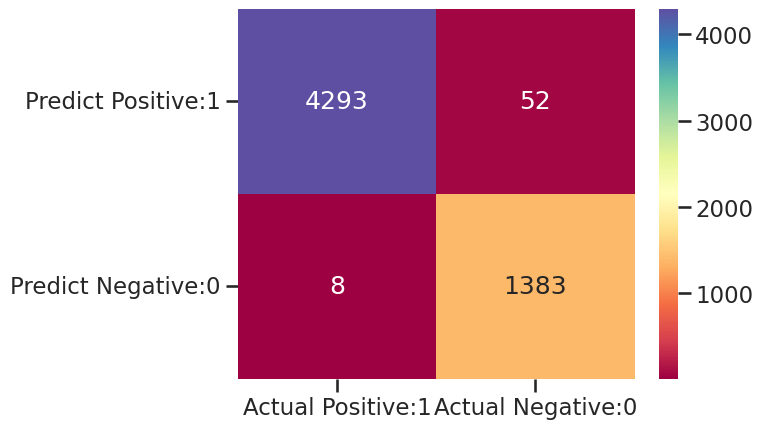

In [ ]:
# Getting the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],
                         index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Spectral')

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

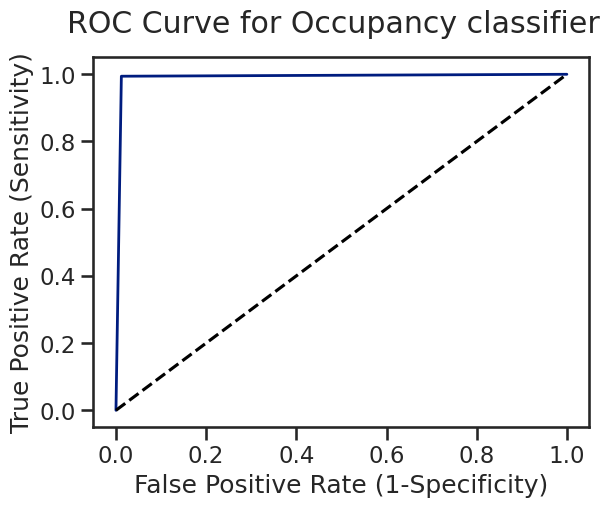

In [ ]:
# Plotting the ROC Curve and getting the ROC-AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1) # Using train variables
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--')
plt.suptitle('ROC Curve for Occupancy classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
# The ROC Curve is ideal as even if the threshold is low, the result is still almost 1

In [ ]:
# Computing the roc-auc score
print(roc_auc_score(y_test, y_pred))
# The area under the ROC Curve is high, which is consistent with the previous metrics
# of an accurate model

0.9900763497711328


Text(0, 0.5, 'accuracy')

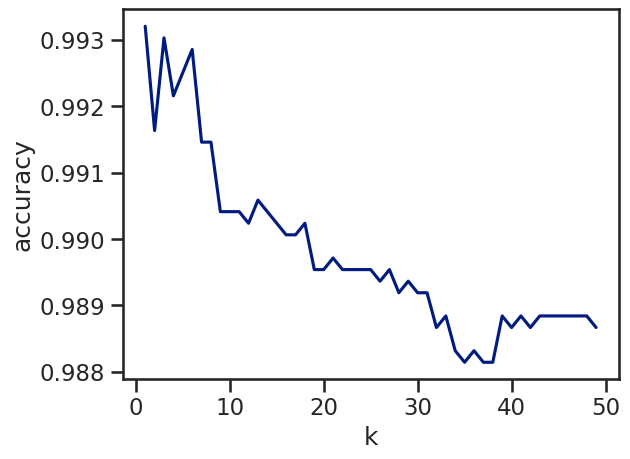

In [ ]:
# Create a graph to compare the accuracy based from each k values
from sklearn.neighbors import KNeighborsClassifier

score_list = []

for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn = knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  score = accuracy_score(y_test, y_pred)

  score_list.append((i, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

plt.plot(score_df['k'], score_df['accuracy'])
plt.xlabel('k')
plt.ylabel('accuracy')
 # It can be seen that the accuracy actually lowers when k becomes higher,
 # which suggests that there is a higher chance of overfitting with very large k
 # meaning that the ideal k value is somewhere in the middle (around 25)

Conclusion

I conclude that in getting a new data, the Nearest Neighbors classifier would classify a data based on the class of the nearest datapoint available. An improvement of this would be the k-Nearest Neighbor classifier where after getting the k nearest neighbors and then "voting" the class based on the most amount of the class